[ 2.77362364e-28+1.62871040e-28j -1.35002560e-26-8.53893145e-27j
  5.78445998e-25+3.93181982e-25j -2.18162759e-23-1.59064504e-23j
  7.24206515e-22+5.65557802e-22j -2.11578319e-20-1.76774375e-20j
  5.43957565e-19+4.85845855e-19j -1.23054288e-17-1.17435520e-17j
  2.44913535e-16+2.49687033e-16j -4.28797410e-15-4.67038252e-15j
  6.60305894e-14+7.68644222e-14j -8.94152957e-13-1.11317768e-12j
  1.06453431e-11+1.41877585e-11j -1.11399005e-10-1.59152048e-10j
  1.02435641e-09+1.57142779e-09j -8.27409967e-09-1.36581282e-08j
  5.86832112e-08+1.04503286e-07j -3.65273657e-07-7.03939265e-07j
  1.99423448e-06+4.17473338e-06j -9.54266159e-06-2.17986733e-05j
  3.99852957e-05+1.00220476e-04j -1.46541794e-04-4.05717101e-04j
  4.69021883e-04+1.44625283e-03j -1.30832004e-03-4.53974196e-03j
  3.17183663e-03+1.25485811e-02j -6.65651407e-03-3.05452488e-02j
  1.20201559e-02+6.54765918e-02j -1.84971244e-02-1.23602811e-01j
  2.38470559e-02+2.05482989e-01j -2.48835740e-02-3.00838120e-01j
  1.92221181e-02+3.878845

C:\Users\MohamedAbouelela\anaconda3\envs\quantumThesis\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


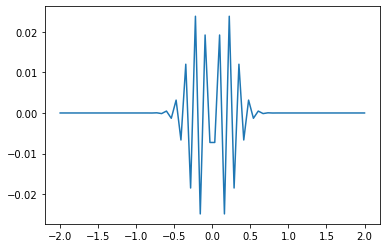

In [228]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

#Preparing the Gaussian-shaped histogram that will be used in the initialisation

x = np.linspace(-2,2, num=64)
storage_for_normalisation = []

Normalisation_wavefunction = (1/(np.sqrt(2*np.pi)*2*0.4)*np.exp(-(0.5*x**2)/(2*0.016)))*np.exp(50j*x)

Normalisation_Constant = np.sqrt(np.sum(np.abs(Normalisation_wavefunction**2)))

waveFunction = (Normalisation_wavefunction)/(Normalisation_Constant)

print(waveFunction)
plt.plot(x,waveFunction)
plt.show()


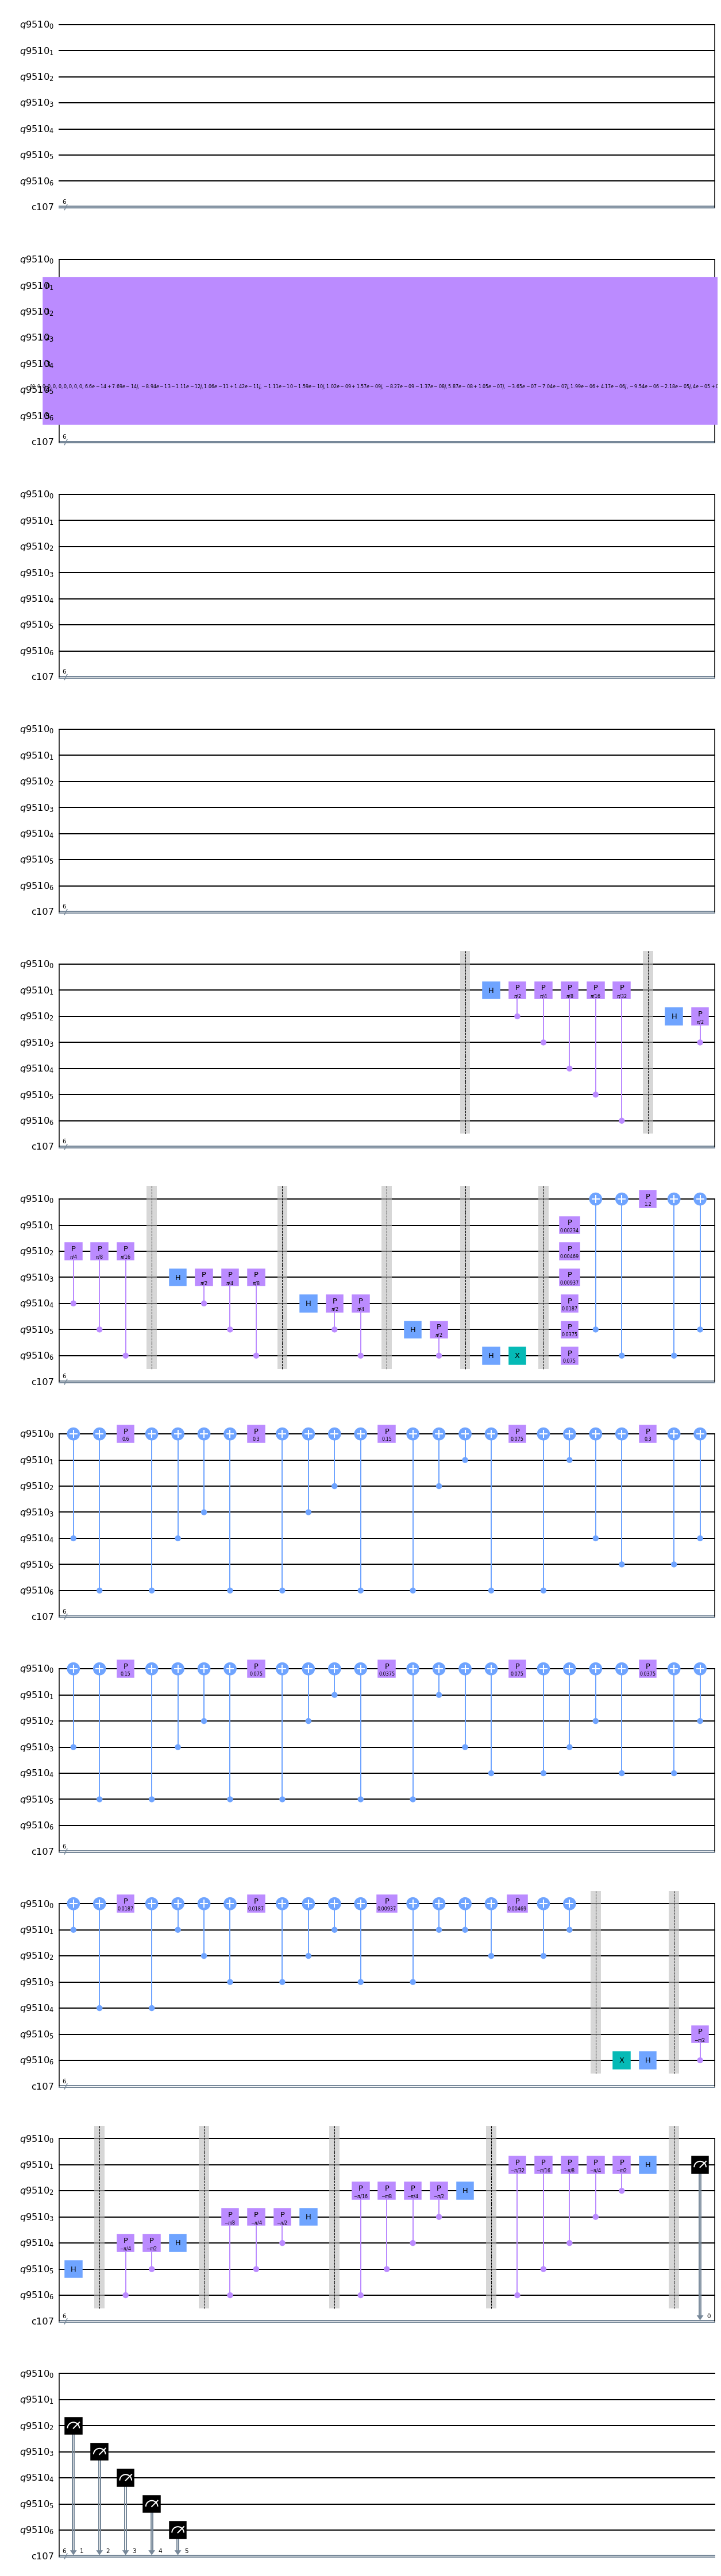

In [229]:


#n = 6 #number of qubits not including ancilla
phi = 0.6

qb = 6

q = QuantumRegister(qb + 1)
c = ClassicalRegister(6)
qc = QuantumCircuit(q,c)

qc2 = QuantumCircuit(q,c)

#Initialisation


def QFT(qubits):
    for i in range(qubits):
        qc.barrier()
        qc.h(i+1)
        for j in range(qubits - 1 - i):
            qc.cp(pi/(2**(j+1)), i+2+j, i+1)




def Time_Evolution(qubits):
    for i in range (qubits):
        qc.p(phi/(2**(i+qubits-3)), qubits-i)
    for i in range (qubits):
        for j in range (i+1,qubits):
            qc.cx(qubits-j, 0)
            qc.cx(qubits-i, 0)
            qc.p(phi* (2**(2-i-j)), 0) #2-i-j or 4?
            qc.cx(qubits-i, 0)
            qc.cx(qubits-j, 0)




def QFT_Inv(qubits):
    for i in reversed(range(qubits)):
        for j in reversed(range(qubits - 1 - i)):
            qc.cp(-pi/(2**(j+1)), i+2+j, i+1)
        qc.h(i+1)
        qc.barrier()

#################################################################################################################


qc.initialize(waveFunction, [q[1],q[2],q[3],q[4],q[5],q[6]])



#######################################################################################################################




#QFT





            
QFT(qb)


qc.x(qb)






#for k in range(6):
  #  qc.measure(k+1,k)
 #   qc2.measure(k+1,k)









qc.barrier()



#Time Step

Time_Evolution(qb)

qc.barrier()




#Inverse QFT

qc.x(qb)



        
QFT_Inv(qb)






#Measurement

for k in range(qb):
    qc.measure(k+1,k)
    qc2.measure(k+1,k)




qc.draw('mpl')


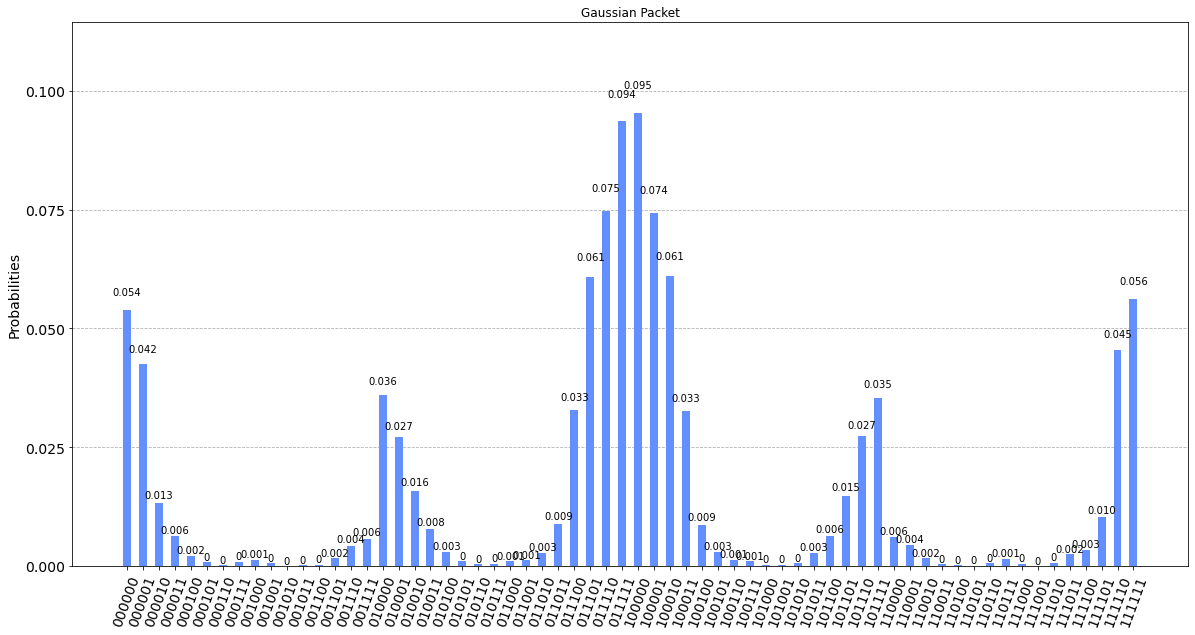

In [230]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 65536
results = execute(qc, backend=backend, shots=shots).result()


answer = results.get_counts()


plot_histogram(answer, title = "Gaussian Packet", figsize = [20,10])

